# Digital to Analog conversion using sinc 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def reconstruct_with_sinc(ts,fd,t):
    n, = ts.shape
    dt = ts[1] - ts[0]
    fr = []
    for k,ti in enumerate(t):
        # for each time point
        sumf = 0.0
        for i in range(n):
            # for each point in a sampled set
            sumf += fd[i]*np.sin(np.pi*(ti/dt-i))/(ti/dt-i)
            
        
        fr.append((1./np.pi)*sumf)
        
    return np.asarray(fr,dtype='f')

/tmp/ipykernel_183547/3109588919.py:12: RuntimeWarning: invalid value encountered in double_scalars
  sumf += fd[i]*np.sin(np.pi*(ti/dt-i))/(ti/dt-i)


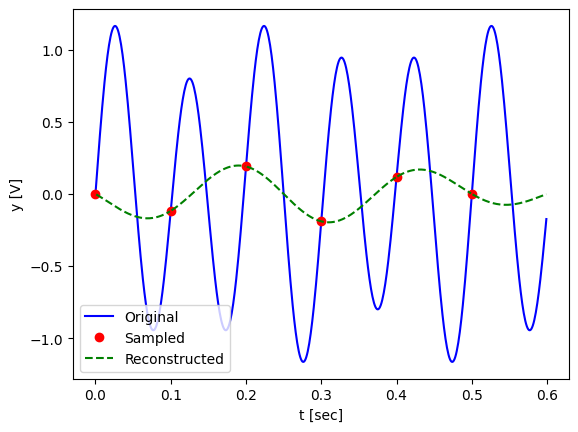

In [3]:
# if __name__ == '__main__':
t = np.arange(0.0,0.6,0.001)
fa = 1.0*np.sin(2*np.pi*10*t)+0.2*np.sin(2*np.pi*6*t)
fs = 10 # Hz
ts = np.arange(0.0,0.6,1./fs) # sampling time
fd = 1.0*np.sin(2*np.pi*10*ts)+0.2*np.sin(2*np.pi*6*ts) # sampled data


plt.figure()
fr = reconstruct_with_sinc(ts,fd,t)
plt.plot(t,fa,'b-',ts,fd,'ro',t,fr,'g--')
plt.xlabel('t [sec]')
plt.ylabel('y [V]')
plt.legend(('Original','Sampled','Reconstructed'))
plt.show()